C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

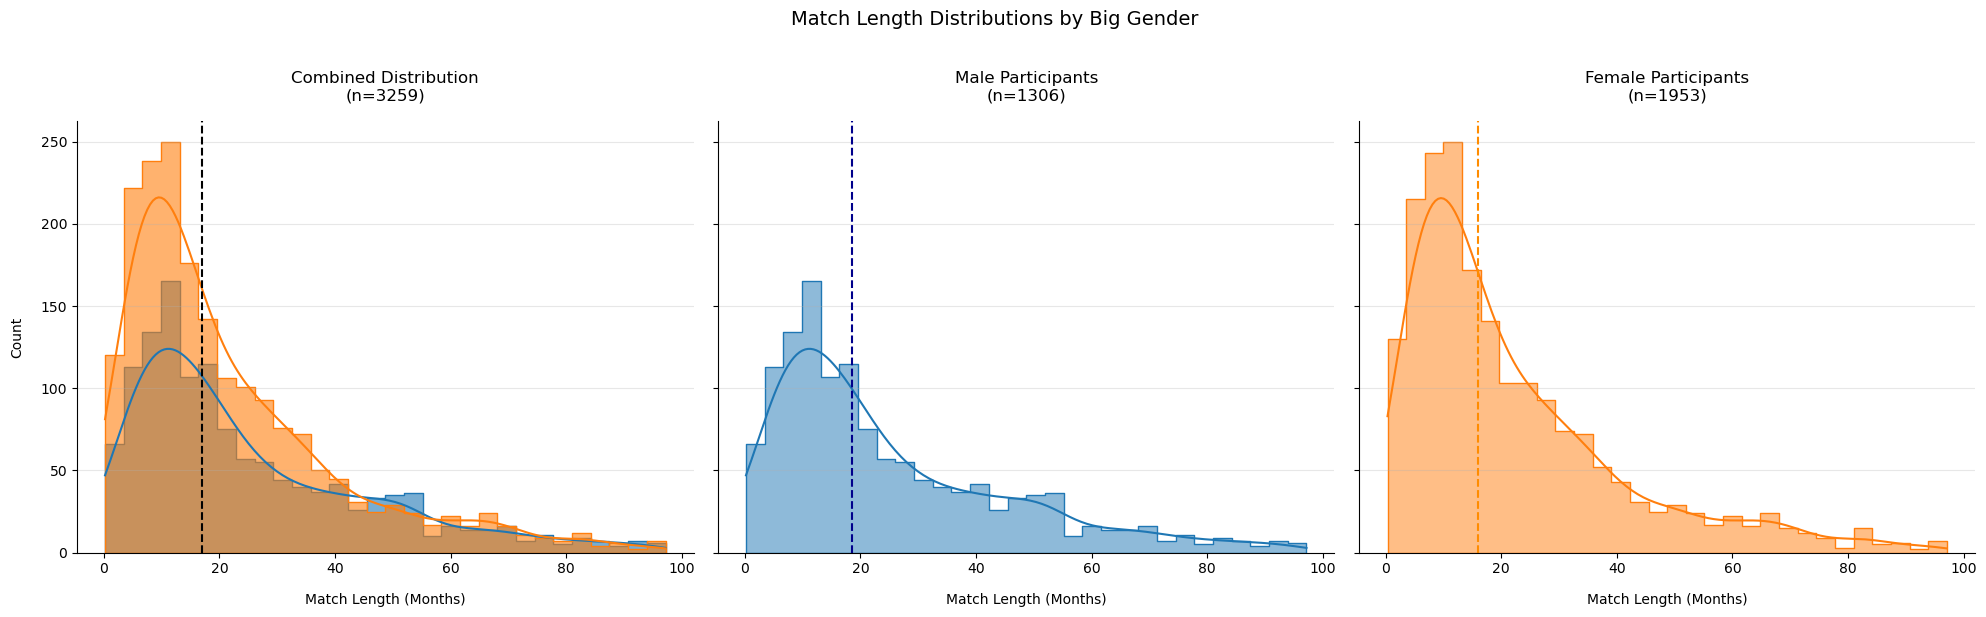


=== Statistical Results ===
Test                     Value          
----------------------------------------
Mann-Whitney U           1394289.50     
p-value                  0.0000         
Cliffs Delta             0.093          
Male Median              18.55          
Female Median            16.00          

=== Interpretation ===
1. There is significant difference in match lengths (p = 0.000)
2. Effect size magnitude: negligible (Δ = 0.09)
3. Probability male > female: 54.7%


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import numpy as np

# Load and clean data
df = pd.read_csv('new_novice.csv')
filtered_df = df[
    (df['Big Gender'].str.upper().isin(['MALE', 'FEMALE'])) &
    (df['Match Length'].notna())
].copy()
filtered_df['Match Length'] = pd.to_numeric(filtered_df['Match Length'], errors='coerce')
filtered_df = filtered_df[filtered_df['Match Length'] > 0]
filtered_df['Big Gender'] = filtered_df['Big Gender'].str.title()

# Split data
male_df = filtered_df[filtered_df['Big Gender'] == 'Male']
female_df = filtered_df[filtered_df['Big Gender'] == 'Female']

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

# Combined histogram
sns.histplot(data=filtered_df, x='Match Length', hue='Big Gender',
            palette={'Male':'#1f77b4', 'Female':'#ff7f0e'},
            element='step', bins=30, kde=True, alpha=0.6, ax=axes[0])
axes[0].set_title(f'Combined Distribution\n(n={len(filtered_df)})', pad=15)
axes[0].axvline(filtered_df['Match Length'].median(), color='black', linestyle='--')

# Male histogram
sns.histplot(data=male_df, x='Match Length', color='#1f77b4',
            element='step', bins=30, kde=True, ax=axes[1])
axes[1].set_title(f'Male Participants\n(n={len(male_df)})', pad=15)
axes[1].axvline(male_df['Match Length'].median(), color='darkblue', linestyle='--')

# Female histogram
sns.histplot(data=female_df, x='Match Length', color='#ff7f0e',
            element='step', bins=30, kde=True, ax=axes[2])
axes[2].set_title(f'Female Participants\n(n={len(female_df)})', pad=15)
axes[2].axvline(female_df['Match Length'].median(), color='darkorange', linestyle='--')

# Formatting
for ax in axes:
    ax.set_xlabel('Match Length (Months)', labelpad=12)
    ax.set_ylabel('Count', labelpad=12)
    ax.grid(axis='y', alpha=0.3)
    ax.legend().remove()

fig.suptitle('Match Length Distributions by Big Gender', y=1.02, fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

# Statistical analysis
male_durations = male_df['Match Length']
female_durations = female_df['Match Length']

# Mann-Whitney U Test
stat, p = mannwhitneyu(male_durations, female_durations)

# Calculate Cliff's Delta properly
n_male = len(male_durations)
n_female = len(female_durations)
cliffs_delta = (2 * stat) / (n_male * n_female) - 1  # Correct formula

# Print results
print("\n=== Statistical Results ===")
print(f"{'Test':<25}{'Value':<15}")
print("-"*40)
print(f"{'Mann-Whitney U':<25}{stat:<15.2f}")
print(f"{'p-value':<25}{p:<15.4f}")
print(f"{'Cliffs Delta':<25}{cliffs_delta:<15.3f}")
print(f"{'Male Median':<25}{male_durations.median():<15.2f}")
print(f"{'Female Median':<25}{female_durations.median():<15.2f}")

print("\n=== Interpretation ===")
print(f"1. There is {'' if p < 0.05 else 'no '}significant difference in match lengths (p = {p:.3f})")
print(f"2. Effect size magnitude: {'negligible' if abs(cliffs_delta) < 0.147 else 'small' if abs(cliffs_delta) < 0.33 else 'medium' if abs(cliffs_delta) < 0.474 else 'large'} (Δ = {cliffs_delta:.2f})")
print(f"3. Probability male > female: {((cliffs_delta + 1)/2):.1%}")

C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

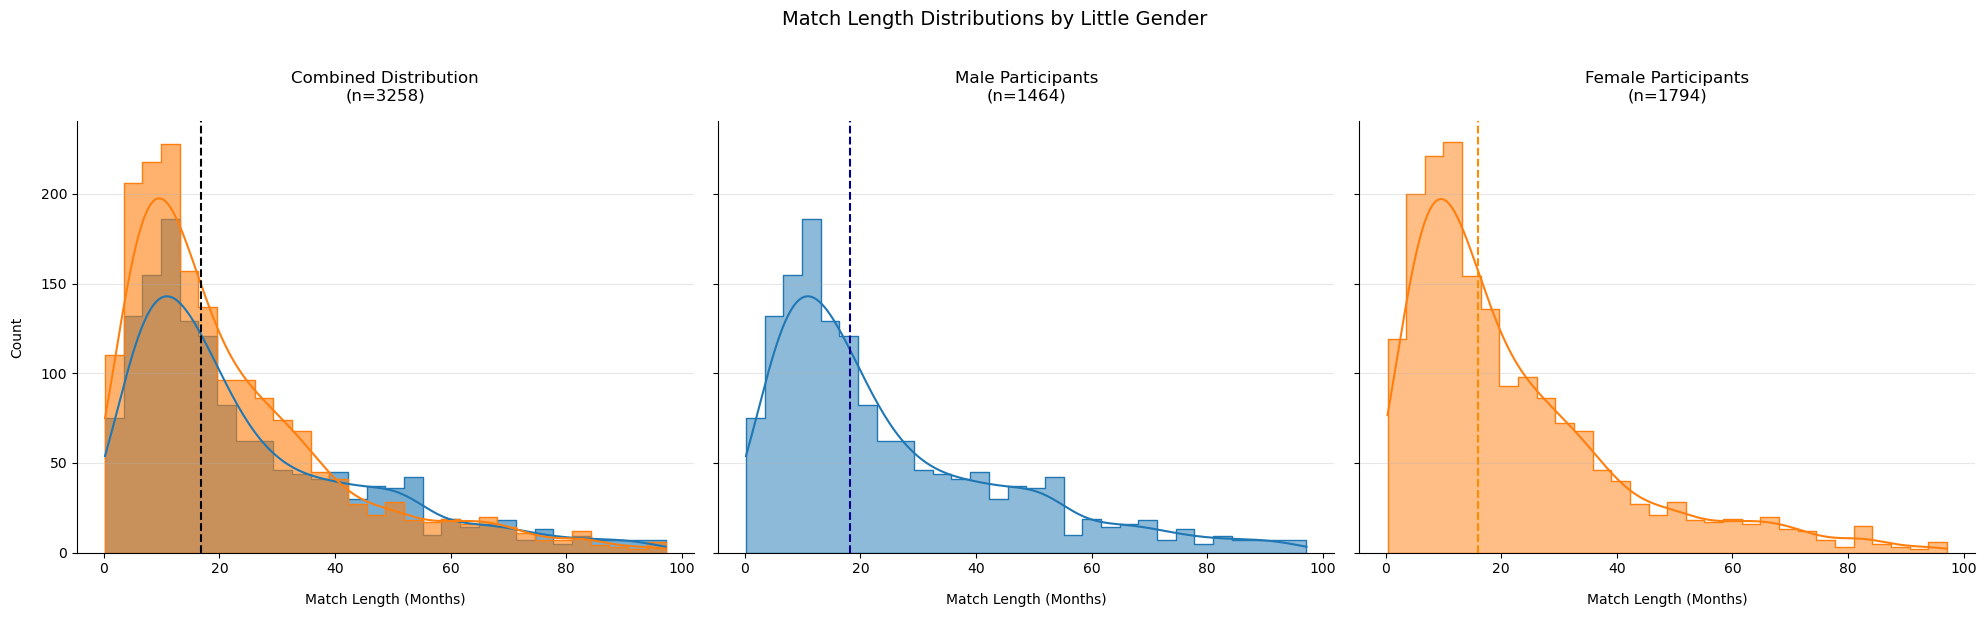


=== Statistical Results ===
Test                     Value          
----------------------------------------
Mann-Whitney U           1422618.00     
p-value                  0.0000         
Cliffs Delta             0.083          
Male Median              18.15          
Female Median            16.00          

=== Interpretation ===
1. There is significant difference in match lengths (p = 0.000)
2. Effect size magnitude: negligible (Δ = 0.08)
3. Probability male > female: 54.2%


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import numpy as np

# Load and clean data
df = pd.read_csv('new_novice.csv')
filtered_df = df[
    (df['Little Gender'].str.upper().isin(['MALE', 'FEMALE'])) &
    (df['Match Length'].notna())
].copy()
filtered_df['Match Length'] = pd.to_numeric(filtered_df['Match Length'], errors='coerce')
filtered_df = filtered_df[filtered_df['Match Length'] > 0]
filtered_df['Little Gender'] = filtered_df['Little Gender'].str.title()

# Split data
male_df = filtered_df[filtered_df['Little Gender'] == 'Male']
female_df = filtered_df[filtered_df['Little Gender'] == 'Female']

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

# Combined histogram
sns.histplot(data=filtered_df, x='Match Length', hue='Little Gender',
            palette={'Male':'#1f77b4', 'Female':'#ff7f0e'},
            element='step', bins=30, kde=True, alpha=0.6, ax=axes[0])
axes[0].set_title(f'Combined Distribution\n(n={len(filtered_df)})', pad=15)
axes[0].axvline(filtered_df['Match Length'].median(), color='black', linestyle='--')

# Male histogram
sns.histplot(data=male_df, x='Match Length', color='#1f77b4',
            element='step', bins=30, kde=True, ax=axes[1])
axes[1].set_title(f'Male Participants\n(n={len(male_df)})', pad=15)
axes[1].axvline(male_df['Match Length'].median(), color='darkblue', linestyle='--')

# Female histogram
sns.histplot(data=female_df, x='Match Length', color='#ff7f0e',
            element='step', bins=30, kde=True, ax=axes[2])
axes[2].set_title(f'Female Participants\n(n={len(female_df)})', pad=15)
axes[2].axvline(female_df['Match Length'].median(), color='darkorange', linestyle='--')

# Formatting
for ax in axes:
    ax.set_xlabel('Match Length (Months)', labelpad=12)
    ax.set_ylabel('Count', labelpad=12)
    ax.grid(axis='y', alpha=0.3)
    ax.legend().remove()

fig.suptitle('Match Length Distributions by Little Gender', y=1.02, fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

# Statistical analysis
male_durations = male_df['Match Length']
female_durations = female_df['Match Length']

# Mann-Whitney U Test
stat, p = mannwhitneyu(male_durations, female_durations)

# Calculate Cliff's Delta properly
n_male = len(male_durations)
n_female = len(female_durations)
cliffs_delta = (2 * stat) / (n_male * n_female) - 1  # Correct formula

# Print results
print("\n=== Statistical Results ===")
print(f"{'Test':<25}{'Value':<15}")
print("-"*40)
print(f"{'Mann-Whitney U':<25}{stat:<15.2f}")
print(f"{'p-value':<25}{p:<15.4f}")
print(f"{'Cliffs Delta':<25}{cliffs_delta:<15.3f}")
print(f"{'Male Median':<25}{male_durations.median():<15.2f}")
print(f"{'Female Median':<25}{female_durations.median():<15.2f}")

print("\n=== Interpretation ===")
print(f"1. There is {'' if p < 0.05 else 'no '}significant difference in match lengths (p = {p:.3f})")
print(f"2. Effect size magnitude: {'negligible' if abs(cliffs_delta) < 0.147 else 'small' if abs(cliffs_delta) < 0.33 else 'medium' if abs(cliffs_delta) < 0.474 else 'large'} (Δ = {cliffs_delta:.2f})")
print(f"3. Probability male > female: {((cliffs_delta + 1)/2):.1%}")